# SEECS Parking Simulation Exploratory Data Analysis

In [68]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Loading Data from file

In [69]:
# read text file into pandas DataFrame
df = pd.read_csv("Without.txt", sep="\t")
df_op = pd.read_csv("With.txt", sep="\t")

## Data Preparation and Cleaning

- Loading the file using pandas

- Fix any missing or incorrect values

In [70]:
cleaned_df = df.copy()
cleaned_df.drop('Car ID', inplace=True, axis=1)
cleaned_df.drop('Unnamed: 26', inplace=True, axis=1)

cleaned_df.drop(cleaned_df[cleaned_df['TBill'] == 0].index, inplace = True)


cleaned_df_op = df_op.copy()
cleaned_df_op.drop('Car ID', inplace=True, axis=1)
cleaned_df_op.drop('Unnamed: 26', inplace=True, axis=1)

cleaned_df_op.drop(cleaned_df_op[cleaned_df_op['TBill'] == 0].index, inplace = True)


## Statistical Analysis

In [71]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = cleaned_df.select_dtypes(include=numerics)

numeric_df_op = cleaned_df_op.select_dtypes(include=numerics)
numeric_df_op.TBill.sum()

622346

## Plotting histogram for idle vehicle during one day

In [72]:
# Sorting the data
numeric_df = numeric_df.sort_values(['EntHr', 'EntMin'], ascending=[True, True])

numeric_df_op = numeric_df_op.sort_values(['EntHr', 'EntMin'], ascending=[True, True])
numeric_df

,VType,Day,ReqT,EntHr,EntMin,ExitHr,ExitMin,TDelay,IdleT,TBill,...,nFill,Tries,DFS,IdleVeh,tFree,z1Free,z2Free,z3Free,z4Free,dReq
3615,5,0,7719,8,15,10,24,7719,910,96,...,1,1,365,4,98,16,52,8,22,12
3967,5,0,9088,8,15,10,47,9088,928,114,...,1,1,365,6,98,16,52,8,22,15
383,5,0,4891,8,17,9,39,4891,1041,61,...,1,1,354,7,97,15,52,8,22,3
821,3,0,7155,8,18,10,17,7155,1072,134,...,1,1,354,4,98,15,53,8,22,19
1559,3,0,11636,8,18,11,32,11636,1089,218,...,1,1,365,2,98,16,52,8,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3558,2,0,789,19,38,19,51,789,38487,23,...,1,1,354,1,65,10,28,7,20,0
1485,3,0,870,19,39,19,53,870,38629,16,...,1,1,654,4,67,4,35,6,22,0
1826,3,0,785,19,41,19,54,785,38723,15,...,8,1,365,7,54,6,25,4,19,0
1490,3,0,727,19,44,19,56,727,38806,14,...,9,1,365,4,66,4,34,6,22,0


In [73]:
print(numeric_df["TBill"].sum())
print(numeric_df_op["TBill"].sum())

601751
622346


In [84]:
hours = sorted(list(df['EntHr'].unique()))  # separating unique hours
sum_of_profits = list(np.zeros(len(hours)))  # creating an empty array for storing sum of idle vehicles in each hour

for hour in range(len(hours)):
    sum_of_profits[hour] = numeric_df[numeric_df['EntHr'] == hours[hour]]['TBill'].sum()
    
    
hours = sorted(list(df['EntHr'].unique()))  # separating unique hours
sum_of_profits_op = list(np.zeros(len(hours)))  # creating an empty array for storing sum of idle vehicles in each hour

for hour in range(len(hours)):
    sum_of_profits_op[hour] = numeric_df_op[numeric_df_op['EntHr'] == hours[hour]]['TBill'].sum()
    
print(hours)
print(sum_of_profits)
print(sum_of_profits_op)

[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[61032, 80889, 58523, 50044, 64579, 62173, 79462, 60696, 40611, 31799, 10859, 1084]
[60290, 86966, 63692, 66568, 57029, 70527, 71609, 61825, 38510, 33027, 11075, 1228]


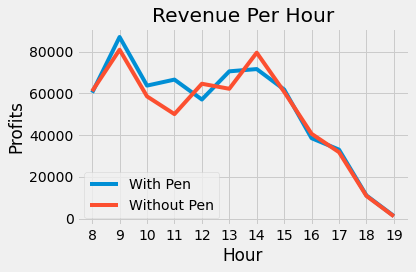

In [75]:
plt.style.use("fivethirtyeight")

plt.plot(hours, sum_of_profits_op, label="With Extra")  #for plotting the graph
plt.plot(hours, sum_of_profits, label="Without Extra")

plt.xlabel("Hour")
plt.ylabel("Profits")
plt.legend()
plt.title("Revenue Per Hour")
plt.xticks(ticks=hours)
plt.tight_layout()
plt.show()